In [6]:
import pandas as pd

In [7]:
Data = pd.read_csv(r"D:\ALGORITMO RECLUTADOR\Proyecto 19-01.remplazo\Todo el proyecto\Data Posición\Defensas.csv")
pd.set_option('display.max_columns', None)

In [8]:
Tackles_media = Data["Tackles"].mean()
Tackles_min = Data["Tackles"].min()
Tackles_max = Data["Tackles"].max()
print(Tackles_media)
print(Tackles_min)
print(Tackles_max)

print("-"*100)

Interceptions_media = Data["Interceptions"].mean()
Interceptions_min = Data["Interceptions"].min()
Interceptions_max = Data["Interceptions"].max()
print(Interceptions_media)
print(Interceptions_min)
print(Interceptions_max)

print("-"*100)

Errors_media = Data["Errors lead to goal"].mean()
Errors_min = Data["Errors lead to goal"].min()
Errors_max = Data["Errors lead to goal"].max()
print(Errors_media)
print(Errors_min)
print(Errors_max)

print("-"*100)

duels_won_def_media = Data["Total duels won %"].mean()
duels_won_def_min = Data["Total duels won %"].min()
duels_won_def_max = Data["Total duels won %"].max()
print(duels_won_def_media)
print(duels_won_def_min)
print(duels_won_def_max)

1.3340090891128236
0.0
4.62
----------------------------------------------------------------------------------------------------
1.1030784429954554
0.0
3.38
----------------------------------------------------------------------------------------------------
0.007812685240071133
0.0
0.15
----------------------------------------------------------------------------------------------------
55.9931673582296
24.44
90.91


In [9]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import unicodedata
import matplotlib.pyplot as plt

Columna_habilidades = Data.columns.drop(["Name", "League"])
features = Data[Columna_habilidades]

# Crea un objeto StandardScaler
scaler = StandardScaler()

# Ajusta el escalador a tus datos y luego transforma tus datos
features_scaled = scaler.fit_transform(features)

# Inicializa el modelo NearestNeighbors
model = NearestNeighbors(n_neighbors=6)  # Buscamos 6 vecinos porque uno de ellos será el jugador mismo

# Ajusta el modelo a tus datos
model.fit(features_scaled)
caracteristicas_grafico = ['Tackles', 'Interceptions', 'Penalty committed', 'Clearances', 'Errors lead to goal', 'Dribbled past']

# Función para normalizar nombres (ignorar mayúsculas y acentos)
def normalizar_nombre(nombre):
    nombre = nombre.lower()
    nombre = unicodedata.normalize('NFD', nombre)
    nombre = nombre.encode('ascii', 'ignore').decode("utf-8")
    return nombre
def buscar_jugadores_similares(nombre, caracteristicas_grafico):
    # Normaliza el nombre que buscas
    nombre_normalizado = normalizar_nombre(nombre)

    # Aplica la normalización a los nombres en el conjunto de datos
    Data['Name_Normalized'] = Data['Name'].apply(normalizar_nombre)

    # Busca el jugador con el nombre normalizado
    jugador = Data[Data['Name_Normalized'] == nombre_normalizado]
    if len(jugador) == 0:
        return 'Jugador no encontrado'
    else:
        jugador_scaled = scaler.transform(jugador[features.columns])
        distancias, indices = model.kneighbors(jugador_scaled)
        jugadores_similares = Data.iloc[indices[0]]  # Excluimos el primer resultado porque será el jugador mismo
        display(jugadores_similares)

        # Escala todas las características de los jugadores similares
        jugadores_similares_scaled = scaler.transform(jugadores_similares[features.columns])

         # Define una lista de colores
        colores = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']

        # Crea un gráfico de radar para cada jugador similar
        fig = go.Figure()
        for i, row in enumerate(jugadores_similares_scaled):
            color = colores[i % len(colores)]  # Elige un color de la lista
            fig.add_trace(go.Scatterpolar(
                r=row[features.columns.isin(caracteristicas_grafico)],
                theta=caracteristicas_grafico,
                fill='toself',
                name=jugadores_similares.iloc[i]['Name'],
                line=dict(color=color)
            ))
        fig.update_layout(
            autosize=False,
            width=800,
            height=800,
            polar=dict(
                radialaxis=dict(
                    visible=True,
                    range=[-2, 3]  # Ajusta este rango según tus datos
                )),
            showlegend=True
        )
        fig.show()

       # Configura una cuadrícula de subplots con 2 filas y 2 columnas
        fig, axs = plt.subplots(2, 2, figsize=(20, 12))  # Ajusta el tamaño según sea necesario

        # Gráfico de dispersión para la media-Goals
        for i, name in enumerate(jugadores_similares['Name']):
            axs[0, 0].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Tackles'], color=colores[i % len(colores)], marker='o')
        for line in [Tackles_max, Tackles_media, Tackles_min]:
            axs[0, 0].axhline(y=line, color='r', linestyle='--')
        axs[0, 0].set_title('Comparativa de Tackles de los jugadores similares')
        axs[0, 0].set_xticks(range(len(jugadores_similares)))
        axs[0, 0].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[0, 0].set_xlabel('Jugadores')
        axs[0, 0].set_ylabel('Tackles')

        # Gráfico de dispersión para la media-Successful
        for i, name in enumerate(jugadores_similares['Name']):
            axs[0, 1].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Interceptions'], color=colores[i % len(colores)], marker='o')
        for line in [Interceptions_max, Interceptions_media, Interceptions_min]:
            axs[0, 1].axhline(y=line, color='r', linestyle='--')
        axs[0, 1].set_title('Media de Interceptions de los jugadores similares')
        axs[0, 1].set_xticks(range(len(jugadores_similares)))
        axs[0, 1].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[0, 1].set_xlabel('Jugadores')
        axs[0, 1].set_ylabel('Interceptions')

        # Gráfico de dispersión para la media-shots
        for i, name in enumerate(jugadores_similares['Name']):
            axs[1, 0].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Errors lead to goal'], color=colores[i % len(colores)], marker='o')
        for line in [Errors_max, Errors_media, Errors_min]:
            axs[1, 0].axhline(y=line, color='r', linestyle='--')
        axs[1, 0].set_title('Media de Errors lead to goal de los jugadores similares')
        axs[1, 0].set_xticks(range(len(jugadores_similares)))
        axs[1, 0].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[1, 0].set_xlabel('Jugadores')
        axs[1, 0].set_ylabel('Errors lead to goal')

        # Gráfico de dispersión para la media-missed
        for i, name in enumerate(jugadores_similares['Name']):
            axs[1, 1].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Total duels won %'], color=colores[i % len(colores)], marker='o')
        for line in [duels_won_def_max, duels_won_def_media, duels_won_def_min]:
            axs[1, 1].axhline(y=line, color='r', linestyle='--')
        axs[1, 1].set_title('Media de Total duels won % de los jugadores similares')
        axs[1, 1].set_xticks(range(len(jugadores_similares)))
        axs[1, 1].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[1, 1].set_xlabel('Jugadores')
        axs[1, 1].set_ylabel('Duels won %')

        # Ajusta el layout para que no haya superposición de elementos
        plt.tight_layout()
        plt.show()
        return 
    

,Name,Goals,Tackles,Interceptions,Penalty committed,Clearances,Errors lead to goal,Dribbled past,Big chances created,Total passes,Accurate passes %,Accurate long balls %,Goals conceded inside the box,Aerial duels won %,Total duels won %,Fouls,Appearances,Age Range,Position,League,Level,Name_Normalized
4346,Benjamín Rojas,0.00,0.85,0.90,0.0,0.50,0.0,0.35,0.0,15.00,74.00,44.44,0.65,43.75,44.79,1.00,20,1,2,Chile Primera,3,benjamin rojas
2725,Eldar Šehić,0.00,1.25,0.79,0.0,0.63,0.0,0.29,0.0,15.92,69.90,34.21,0.67,40.00,49.46,1.13,24,1,2,Republica Checa 1. Liga,3,eldar sehic
2747,Denis Donát,0.05,0.70,0.90,0.0,0.70,0.0,0.25,0.0,14.55,68.38,38.78,0.50,42.11,41.43,0.80,20,1,2,Republica Checa 1. Liga,3,denis donat
4586,Edilberto Gómez,0.00,1.29,0.57,0.0,0.86,0.0,0.57,0.0,15.43,77.78,45.83,0.64,45.45,40.28,1.21,14,1,2,Colombia Primera,3,edilberto gomez
4191,Tim Sechelmann,0.00,0.73,0.82,0.0,1.18,0.0,0.45,0.0,25.00,80.36,40.00,0.73,45.45,46.30,0.82,11,1,2,Alemania Bundesliga 2,3,tim sechelmann
2409,Piero Serra,0.00,1.19,0.69,0.0,0.81,0.0,0.42,0.0,12.00,73.08,50.00,0.58,42.31,49.14,0.96,26,2,2,Peru Liga 1,3,piero serra


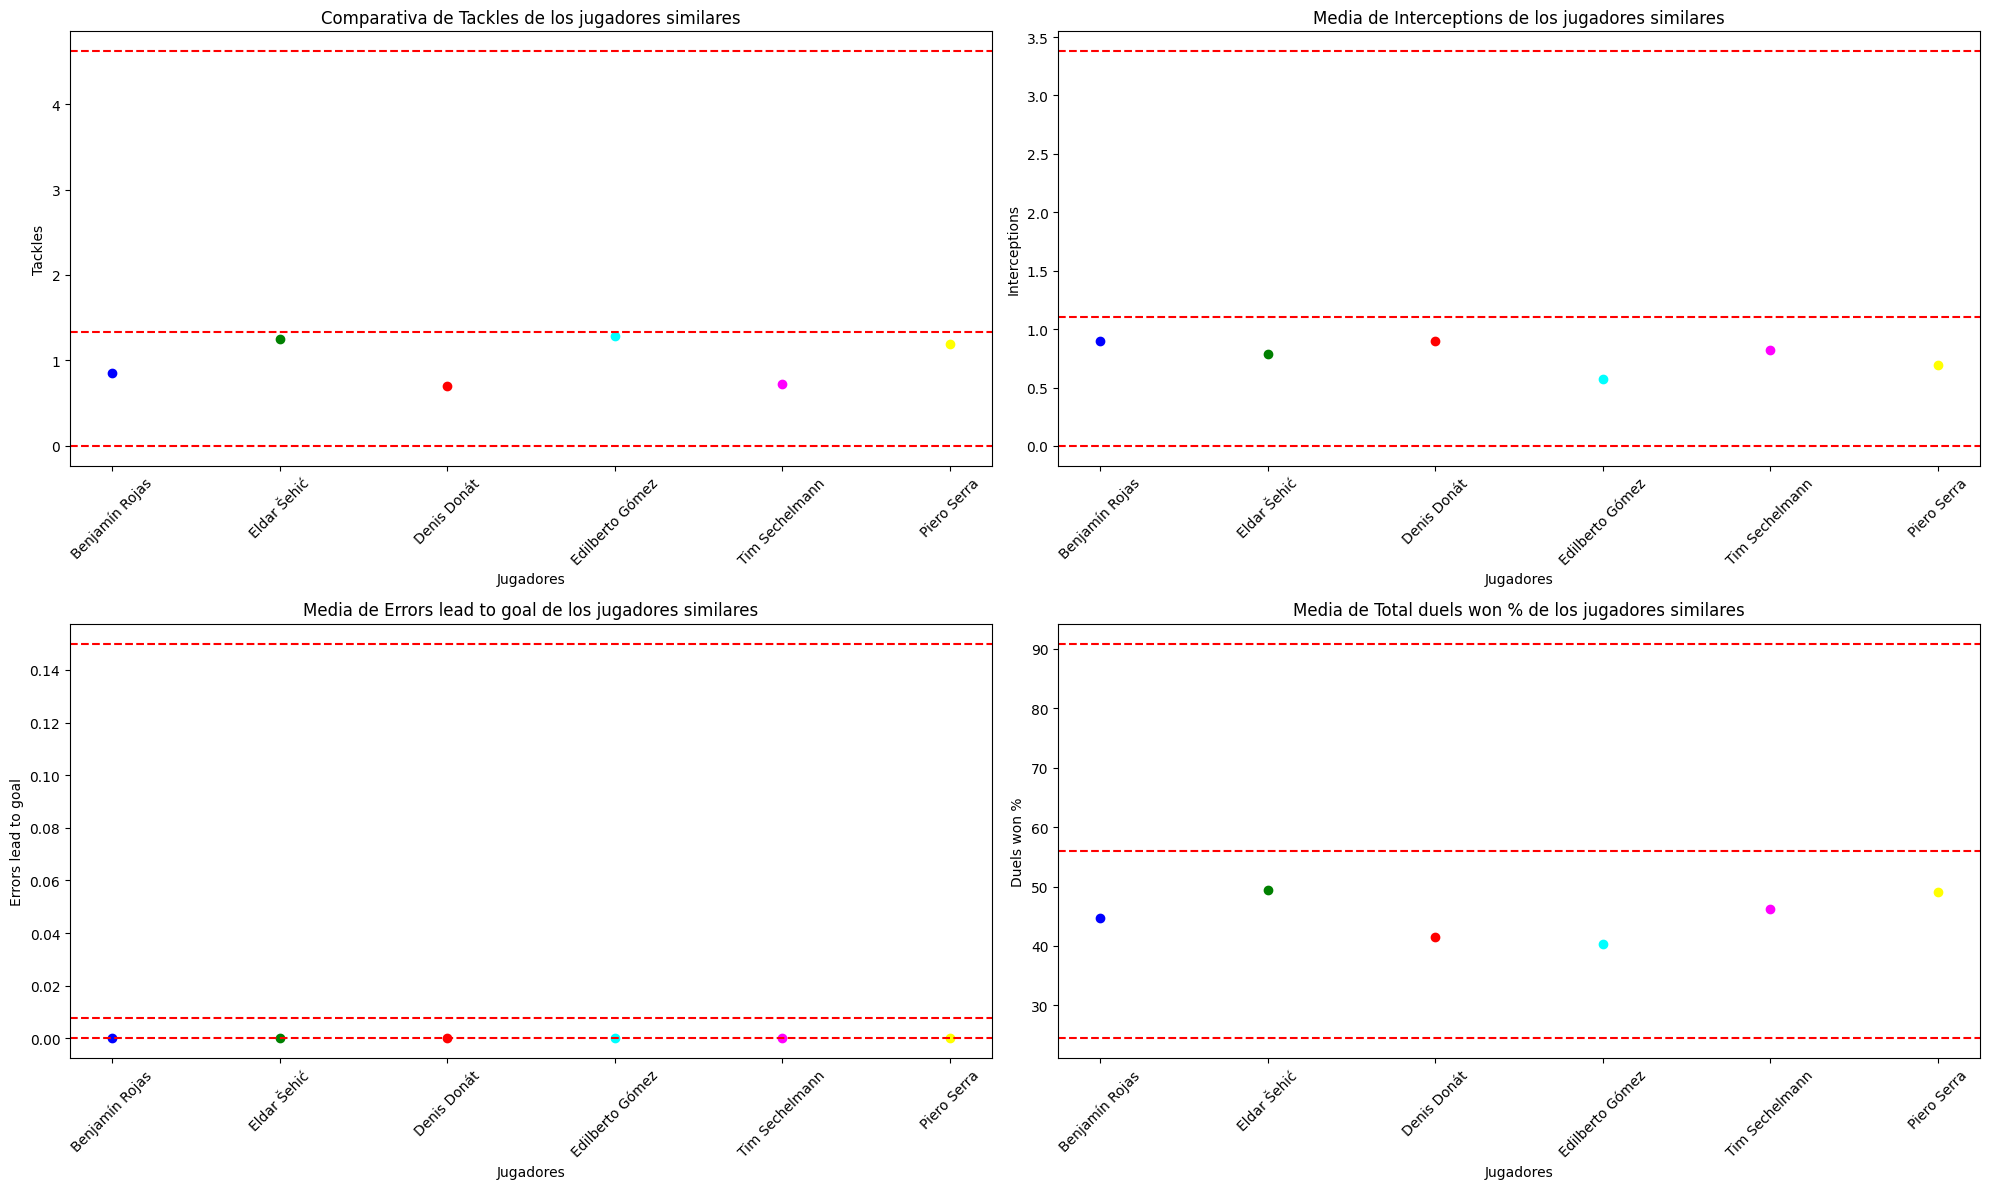

In [10]:
buscar_jugadores_similares('Benjamín Rojas', caracteristicas_grafico)